Classification Accuracy: 1.0


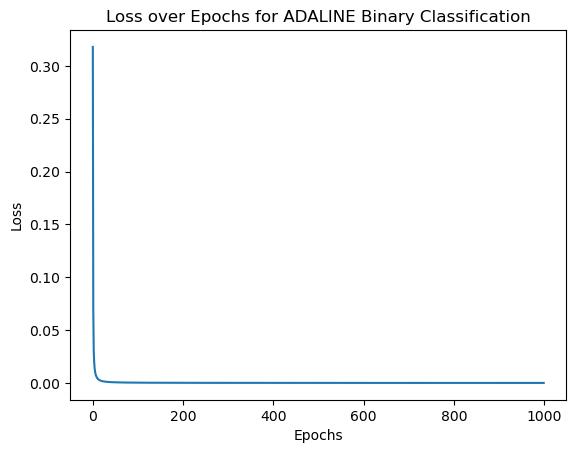

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset for binary classification (class 0 vs others)
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Binary classification for class 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ADALINE model with sigmoid activation
class ADALINEClassifier:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()
        
        for epoch in range(self.epochs):
            # Linear output
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_output)
            error = y - y_pred
            
            # Update weights and bias
            self.weights += self.learning_rate * np.dot(X.T, error)
            self.bias += self.learning_rate * error.sum()

            # Record loss for visualization
            loss = np.mean((error) ** 2) / 2
            self.loss_history.append(loss)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return (self.sigmoid(linear_output) >= 0.5).astype(int)

# Train the model and evaluate
adaline_clf = ADALINEClassifier(learning_rate=0.01, epochs=1000)
adaline_clf.train(X_train, y_train)
predictions = adaline_clf.predict(X_test)
accuracy = (predictions == y_test).mean()

print(f"Classification Accuracy: {accuracy}")

# Plot loss over epochs
plt.plot(adaline_clf.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for ADALINE Binary Classification')
plt.show()


Regression MSE: 234.45500969670798


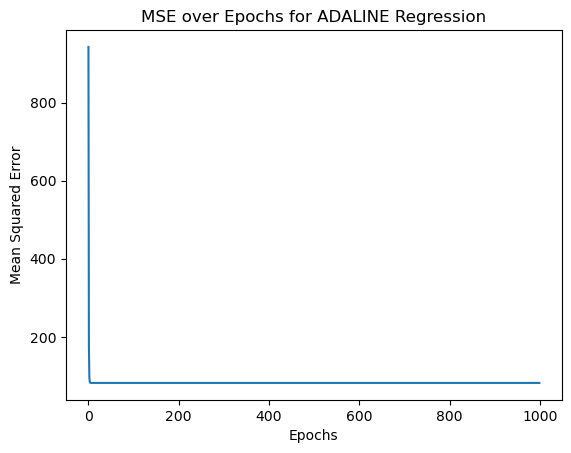

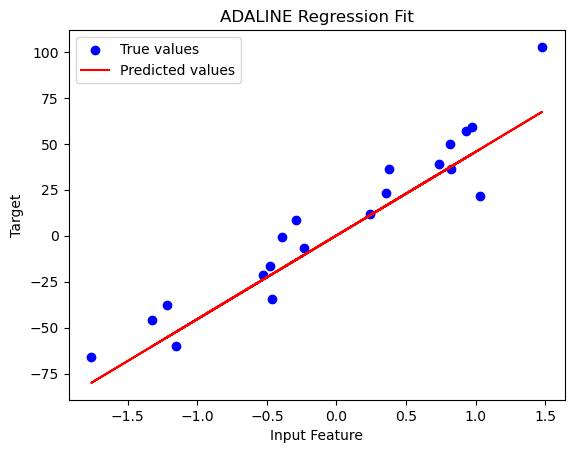

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class ADALINERegressor:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()
        
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y - y_pred

            # Update weights and bias
            self.weights += self.learning_rate * np.dot(X.T, error)
            self.bias += self.learning_rate * error.sum()

            # Record MSE loss
            loss = np.mean(error ** 2) / 2
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the regression model
adaline_reg = ADALINERegressor(learning_rate=0.01, epochs=1000)
adaline_reg.train(X_train, y_train)
predictions = adaline_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f"Regression MSE: {mse}")

# Plot loss over epochs
plt.plot(adaline_reg.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs for ADALINE Regression')
plt.show()

# Plot the regression fit
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, predictions, color='red', label='Predicted values')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('ADALINE Regression Fit')
plt.legend()
plt.show()


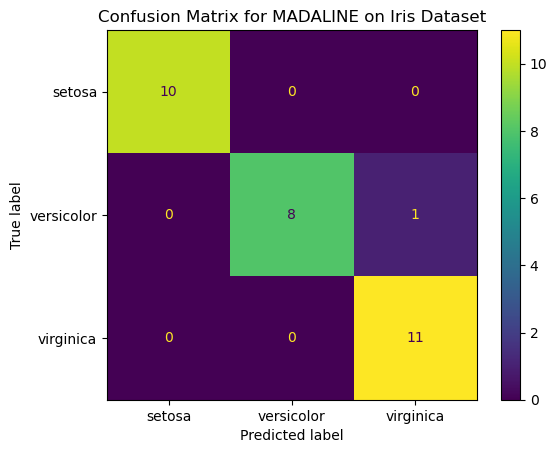

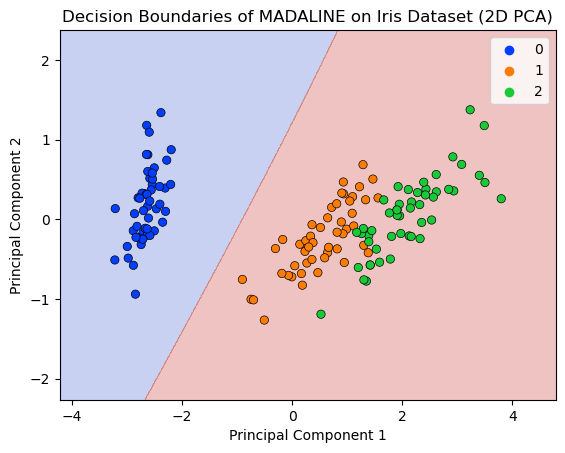

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import seaborn as sns

# Load and preprocess the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Encode target labels for multiclass classification
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train MADALINE model
madaline_clf = MADALINEClassifier(input_dim=4, hidden_neurons=3, output_dim=3, learning_rate=0.01, epochs=1000)
madaline_clf.train(X_train, y_train)
predictions = madaline_clf.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Plot Confusion Matrix
cm = confusion_matrix(y_true, predictions)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title("Confusion Matrix for MADALINE on Iris Dataset")
plt.show()

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train MADALINE on 2D data for plotting decision boundaries
madaline_clf_2d = MADALINEClassifier(input_dim=2, hidden_neurons=3, output_dim=3, learning_rate=0.01, epochs=1000)
madaline_clf_2d.train(X_train_pca, y_train)

# Generate grid for decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = madaline_clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data.target, palette='bright', edgecolor='k')
plt.title("Decision Boundaries of MADALINE on Iris Dataset (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Epoch 0, MSE: 29711.313003384574
Epoch 100, MSE: 2922.9139346975144
Epoch 200, MSE: 2915.1986160027313
Epoch 300, MSE: 2909.102335640042
Epoch 400, MSE: 2904.5905776839777
Epoch 500, MSE: 2901.6273496635786
Epoch 600, MSE: 2899.6585198758335
Epoch 700, MSE: 2898.521390917595
Epoch 800, MSE: 2898.0686960221697
Epoch 900, MSE: 2898.0502677072054
Final Regression MSE: 2968.3149470926674


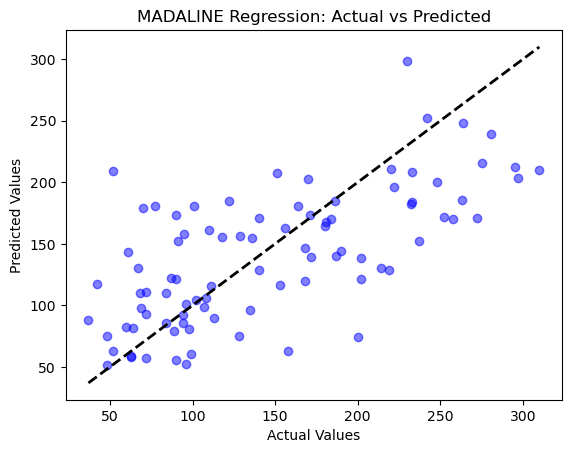

In [25]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class MADALINERegressor:
    def __init__(self, input_dim, hidden_neurons=5, learning_rate=0.001, epochs=1000, grad_clip=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.grad_clip = grad_clip

        # Initialize weights for hidden and output layers
        self.weights_hidden = np.random.randn(input_dim, hidden_neurons) * 0.01
        self.bias_hidden = np.zeros((1, hidden_neurons))
        self.weights_output = np.random.randn(hidden_neurons, 1) * 0.01
        self.bias_output = np.zeros((1, 1))

    def adaline(self, inputs):
        return inputs  # Linear activation for ADALINE

    def train(self, X, y):
        y = y.reshape(-1, 1)
        for epoch in range(self.epochs):
            # Forward pass: Hidden layer
            hidden_input = np.dot(X, self.weights_hidden) + self.bias_hidden
            hidden_output = self.adaline(hidden_input)  # ADALINE in hidden layer

            # Forward pass: Output layer
            final_input = np.dot(hidden_output, self.weights_output) + self.bias_output
            final_output = final_input  # Linear activation for regression

            # Calculate error
            error = y - final_output

            # Backpropagation for output layer
            output_delta = -2 * error / X.shape[0]
            hidden_error = output_delta.dot(self.weights_output.T)

            # Gradient clipping for stability
            output_delta = np.clip(output_delta, -self.grad_clip, self.grad_clip)
            hidden_error = np.clip(hidden_error, -self.grad_clip, self.grad_clip)

            # Update weights and biases
            self.weights_output -= self.learning_rate * hidden_output.T.dot(output_delta)
            self.bias_output -= self.learning_rate * output_delta.sum(axis=0, keepdims=True)
            self.weights_hidden -= self.learning_rate * X.T.dot(hidden_error)
            self.bias_hidden -= self.learning_rate * hidden_error.sum(axis=0, keepdims=True)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                mse = np.mean(error ** 2)
                print(f"Epoch {epoch}, MSE: {mse}")

    def predict(self, X):
        hidden_output = self.adaline(np.dot(X, self.weights_hidden) + self.bias_hidden)
        return np.dot(hidden_output, self.weights_output) + self.bias_output

# Train and evaluate the MADALINE regression model
madaline_reg = MADALINERegressor(input_dim=X.shape[1], hidden_neurons=5, learning_rate=0.001, epochs=1000, grad_clip=1.0)
madaline_reg.train(X_train, y_train)
predictions = madaline_reg.predict(X_test)

# Check if predictions contain NaN
if np.isnan(predictions).any():
    print("NaN values found in predictions after training.")
else:
    mse = mean_squared_error(y_test, predictions)
    print(f"Final Regression MSE: {mse}")

    # Plotting the predictions vs actual values
    plt.scatter(y_test, predictions, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MADALINE Regression: Actual vs Predicted')
    plt.show()
